In [1]:
# import packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from pyimagesearch.preprocessing import ImageToArrayPreprocessor
from pyimagesearch.preprocessing import AspectAwarePreprocessor
from pyimagesearch.datasets import SimpleDatasetLoader
from pyimagesearch.nn.conv import MiniVGGNet
from tensorflow.keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt 
import numpy as np 
import os

In [2]:
args = {
    'dataset' : '/floyd/input/flowers_17'
}

In [3]:
# grab the list of images that we'll be describing, then extract
# the class label names from the image paths
print("[INFO] loading images...")
imagePaths = list(paths.list_images(args['dataset']))
classNames = [pt.split(os.path.sep)[-2] for pt in imagePaths]
classNames = [str(x) for x in np.unique(classNames)]

# initialize the image preprocessor
aap = AspectAwarePreprocessor(64,64)
iap = ImageToArrayPreprocessor()

# load the datasets from disk then scale the raw pixel intensifies to range [0, 1]
sdl = SimpleDatasetLoader(preprocessors=[aap,iap])
(data, labels) = sdl.load(imagePaths, verbose=500)
data = data.astype('float') / 255.0

[INFO] loading images...
[INFO] processed 500/1360
[INFO] processed 1000/1360


In [4]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

# convert the labels to vectors
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

In [5]:
# initialize the optimizer and model
print("[INFO] Compiling model...")
opt = SGD(lr=0.05)
model = MiniVGGNet.build(width=64, height=64, depth=3, classes=len(classNames))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# train the network
print("[INFO] Training the network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=32, epochs=100,verbose=1)

[INFO] Compiling model...
[INFO] Training the network...
Train on 1020 samples, validate on 340 samples
Epoch 1/100
1020/1020 [==============================] - 35s 34ms/sample - loss: 3.2334 - accuracy: 0.2216 - val_loss: 2.5057 - val_accuracy: 0.2441
Epoch 2/100
1020/1020 [==============================] - 26s 26ms/sample - loss: 1.8596 - accuracy: 0.4549 - val_loss: 2.5718 - val_accuracy: 0.2353
Epoch 3/100
1020/1020 [==============================] - 26s 26ms/sample - loss: 1.3362 - accuracy: 0.5814 - val_loss: 3.0299 - val_accuracy: 0.1912
Epoch 4/100
1020/1020 [==============================] - 26s 25ms/sample - loss: 1.0152 - accuracy: 0.6755 - val_loss: 3.8612 - val_accuracy: 0.1765
Epoch 5/100
1020/1020 [==============================] - 26s 25ms/sample - loss: 0.7485 - accuracy: 0.7529 - val_loss: 2.3493 - val_accuracy: 0.3176
Epoch 6/100
1020/1020 [==============================] - 26s 25ms/sample - loss: 0.5826 - accuracy: 0.7990 - val_loss: 2.0196 - val_accuracy: 0.3912
Ep

[INFO] evaluating the network..
              precision    recall  f1-score   support

    bluebell       0.59      0.62      0.61        16
   buttercup       0.53      0.50      0.51        18
   coltsfoot       0.35      0.44      0.39        16
     cowslip       0.35      0.40      0.37        20
      crocus       0.70      0.84      0.76        19
    daffodil       0.35      0.30      0.32        20
       daisy       0.80      0.80      0.80        15
   dandelion       0.60      0.60      0.60        20
  fritillary       0.65      0.75      0.70        20
        iris       0.88      0.68      0.77        22
  lilyvalley       0.67      0.52      0.59        23
       pansy       0.94      0.65      0.77        23
    snowdrop       0.44      0.44      0.44        18
   sunflower       0.90      1.00      0.95        19
   tigerlily       0.85      0.74      0.79        23
       tulip       0.24      0.33      0.28        21
  windflower       0.73      0.70      0.72      

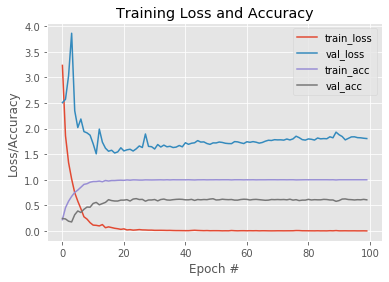

In [6]:
# evalute the network
print("[INFO] evaluating the network..")
predictions =  model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=(classNames)))

# plot the training loss and accuracy
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()